# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [31]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns
from matplotlib import rc
from pylab import rcParams

rcParams['figure.figsize'] = 22, 8

## load the data sets

In [32]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [33]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [34]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

In [35]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

In [36]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df.head(10)

,lat,lon,city,country,day,month,year
date,,,,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom,14,5,2014
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom,14,5,2014
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom,14,5,2014
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom,14,5,2014
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom,14,5,2014
2014-05-14 12:23:00,51.480146,-0.441103,Hounslow,United Kingdom,14,5,2014
2014-05-14 12:38:00,51.479669,-0.441024,Hounslow,United Kingdom,14,5,2014
2014-05-14 15:11:00,38.781775,-9.137544,Lisbon,Portugal,14,5,2014
2014-05-14 15:25:00,38.774422,-9.129195,Lisbon,Portugal,14,5,2014


Now you try: re-create the plot above, but make the bars orange with maroon edges.

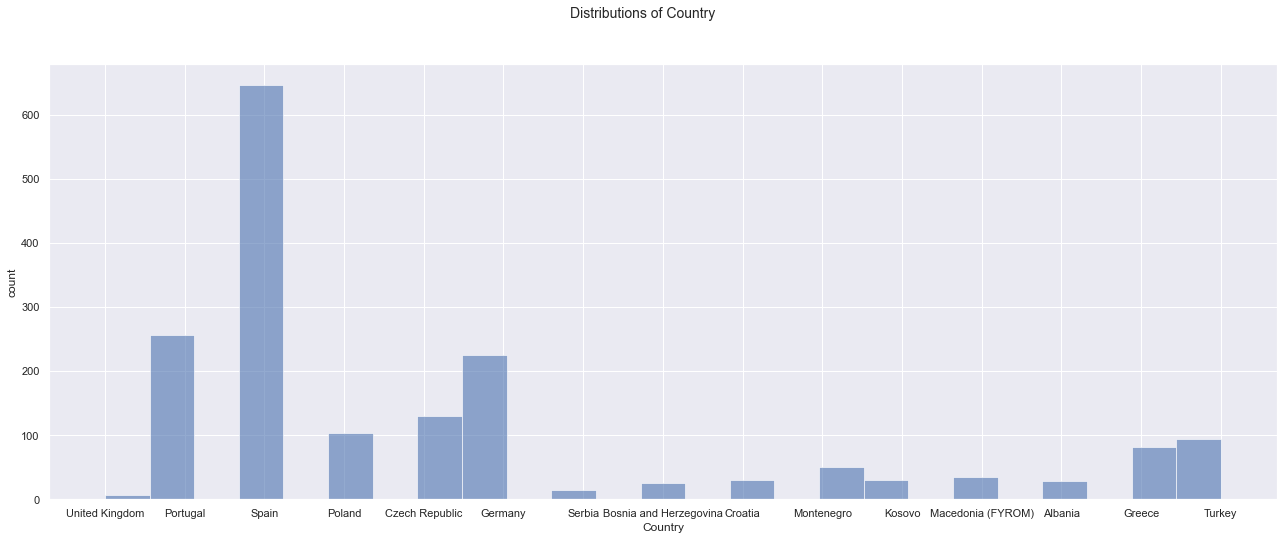

In [37]:
plt.suptitle('Distributions of Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('count')
g = plt.hist(df['country'], bins=25, alpha=.6, color='b')
plt.show()

In [38]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

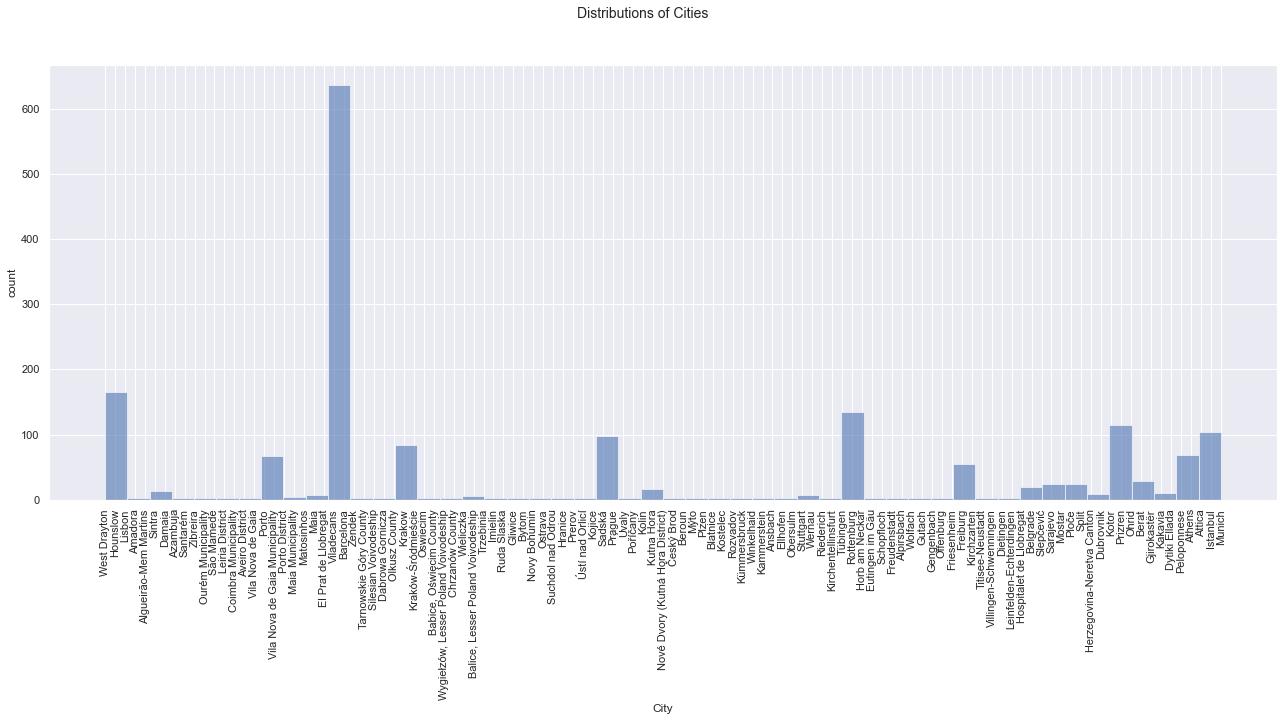

In [39]:
plt.suptitle('Distributions of Cities', fontsize=14)
plt.xlabel('City')
plt.ylabel('count')
g = plt.hist(df['city'], bins = 50, alpha=.6, color='b')
plt.xticks(rotation = 'vertical')
plt.show()


## Next: scatter plots as simple maps

In [40]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

AttributeError: 'AxesSubplot' object has no attribute 'show'

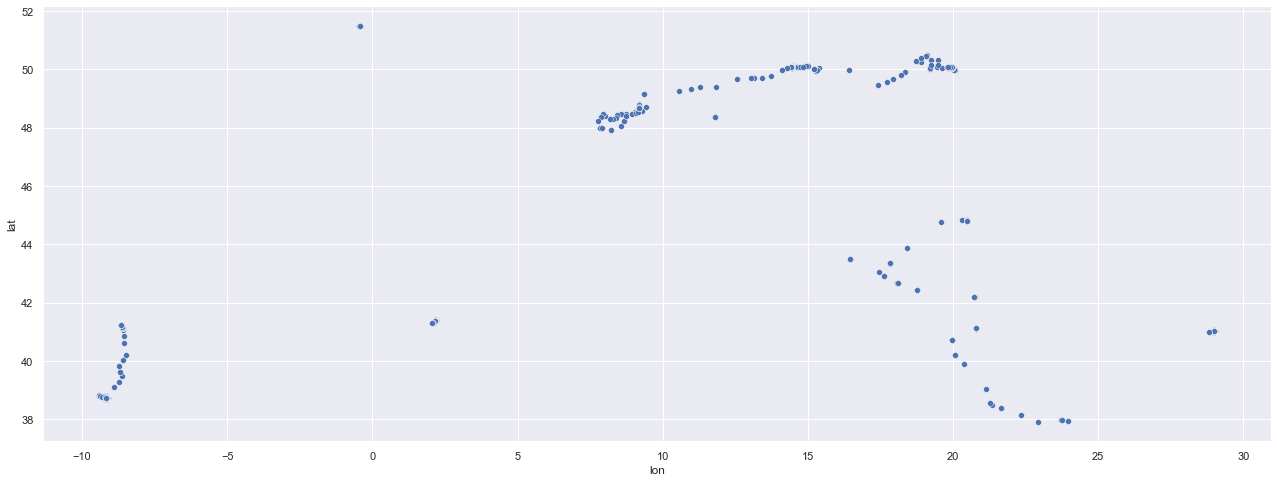

In [41]:
s_plot = sns.scatterplot(x= "lon", y= "lat", data= df)
s_plot.show()

## Line charts, with annotation

In [42]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

In [43]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 

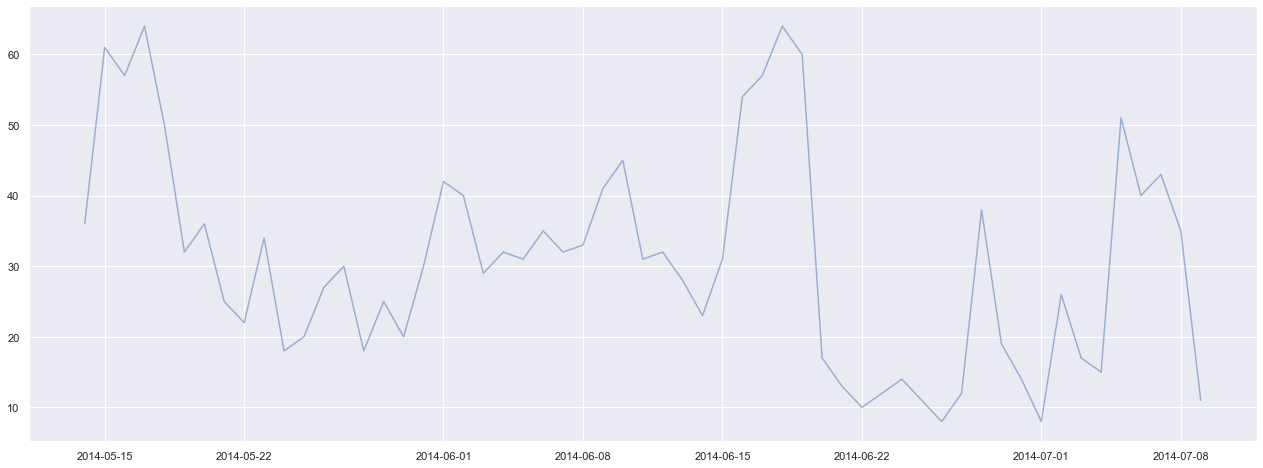

In [47]:
sns.set_theme(style="darkgrid")

l_plot = sns.lineplot(data = countdata, alpha = 0.5)


In [12]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

## Pie charts

In [48]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [14]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

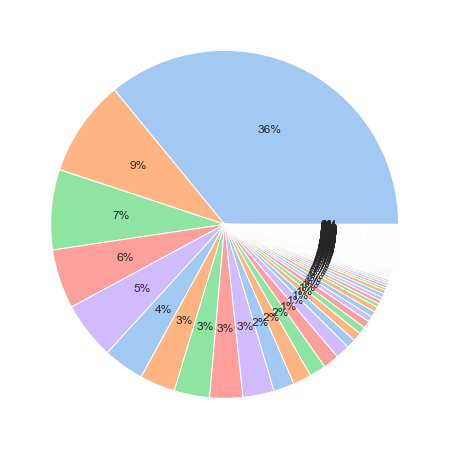

In [60]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(cities, colors = colors, autopct='%.0f%%')
plt.show()